In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import os

In [3]:
print(tf. __version__)

2.8.0


In [2]:
# Load the data
data_path = 'snapshots_20_J5'
file_names = os.listdir(data_path)
data = []
labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 11.34:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        data.append(file_data)
        labels.append(label)
data = np.array(data)
labels = np.array(labels)

In [7]:
np.shape(data)

(20000, 20, 20, 1)

In [3]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(20,20,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(data, labels, epochs=50, validation_split=0.2)

Epoch 1/50
500/500 [==============================] - 8s 8ms/step - loss: 0.4497 - accuracy: 0.7751 - val_loss: 0.3768 - val_accuracy: 0.8820
Epoch 2/50
500/500 [==============================] - 4s 7ms/step - loss: 0.3865 - accuracy: 0.8127 - val_loss: 0.3849 - val_accuracy: 0.9045
Epoch 3/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3716 - accuracy: 0.8196 - val_loss: 0.3995 - val_accuracy: 0.8633
Epoch 4/50
500/500 [==============================] - 4s 7ms/step - loss: 0.3664 - accuracy: 0.8238 - val_loss: 0.5613 - val_accuracy: 0.7617
Epoch 5/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3570 - accuracy: 0.8281 - val_loss: 0.4536 - val_accuracy: 0.8188
Epoch 6/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3485 - accuracy: 0.8333 - val_loss: 0.3810 - val_accuracy: 0.8580
Epoch 7/50
500/500 [==============================] - 4s 8ms/step - loss: 0.3416 - accuracy: 0.8404 - val_loss: 0.4922 - val_accuracy: 0.8000
Epoch 

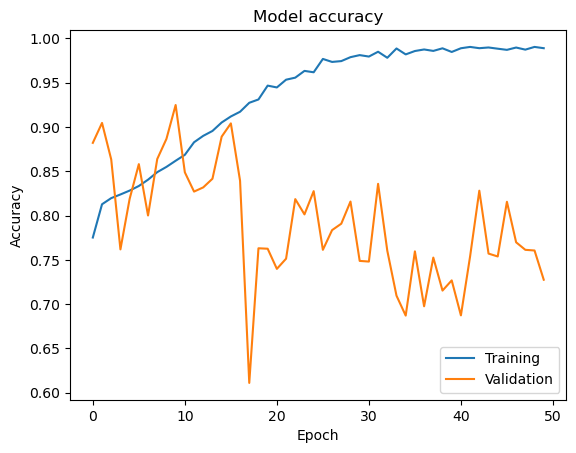

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

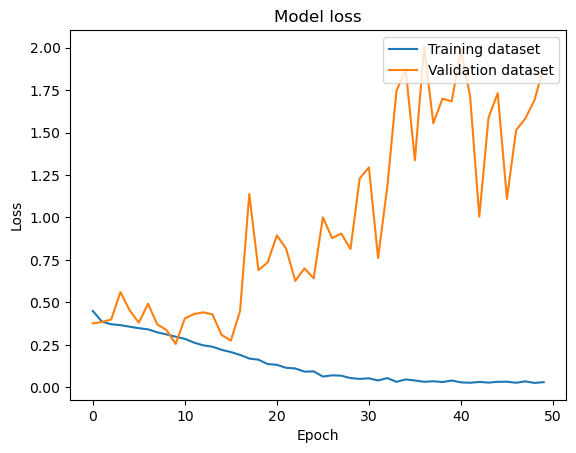

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

In [10]:
# Load the test data
data_path = 'test_20_J5_misclassification'
file_names = os.listdir(data_path)
test_data = []
test_labels = []
for file_name in file_names:
    temperature = float(file_name.split('_')[1])/100  # Extract the temperature from the file name
    if temperature <= 11.34:  # Ordered phase
        label = 0
    else:  # Disordered phase
        label = 1
    file_path = os.path.join(data_path, file_name)
    with open(file_path, 'r') as f:
        file_data = np.loadtxt(f)
        file_data = np.expand_dims(file_data, axis=-1)  # Add a channel dimension
        test_data.append(file_data)
        test_labels.append(label)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [11]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

590/590 [==============================] - 3s 4ms/step - loss: 4.2515 - accuracy: 0.5129


In [12]:
for i in range(60):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

20/20 [==============================] - 0s 5ms/step - loss: 5.7641 - accuracy: 0.5100


In [13]:
len(test_data)

5900

In [14]:
test_loss, test_acc = model.evaluate(test_data, test_labels, batch_size=10)

590/590 [==============================] - 3s 5ms/step - loss: 4.2515 - accuracy: 0.5129


In [20]:
for i in range(59):
    test_loss, test_acc = model.evaluate(test_data[i*100:(i+1)*100], test_labels[i*100:(i+1)*100], batch_size=5)

20/20 [==============================] - 0s 5ms/step - loss: 5.2832 - accuracy: 0.5300


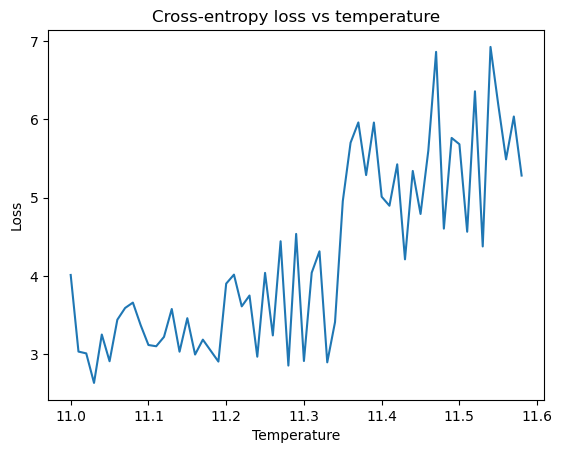

In [22]:
loss_list = [4.0136,
3.0347,
3.0117,
2.6344,
3.2526,
2.9112,
3.4418,
3.5919,
3.6606,
3.3726,
3.1188,
3.1028,
3.2225,
3.5788,
3.0332,
3.4614,
2.9971,
3.1873,
3.0472,
2.907,
3.9028,
4.0178,
3.6124,
3.7508,
2.9694,
4.0401,
3.2411,
4.4442,
2.8561,
4.5378,
2.9144,
4.042,
4.3156,
2.8973,
3.4115,
4.9569,
5.7031,
5.9619,
5.2897,
5.9606,
5.0129,
4.8979,
5.4268,
4.2131,
5.3422,
4.793,
5.6016,
6.8635,
4.6054,
5.7641,
5.6837,
4.5656,
6.3595,
4.3777,
6.9266,
6.1864,
5.4905,
6.0376,
5.2832,
]
bins = [11.01+0.01*i for i in range(58)]
bins.insert(0, 11.00)
plt.plot(bins, loss_list)
plt.title('Cross-entropy loss vs temperature')
plt.ylabel('Loss')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

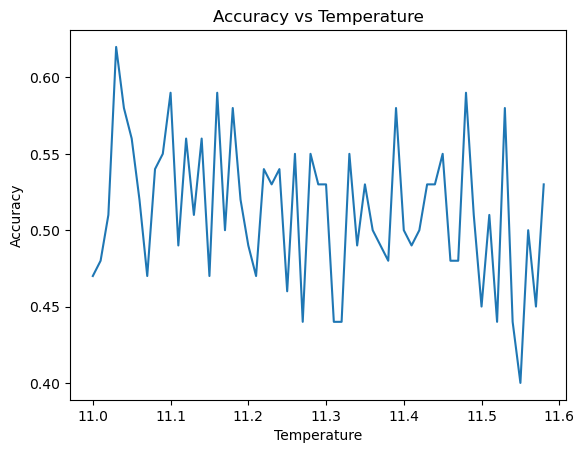

In [24]:
acc_list = [0.47,
0.48,
0.51,
0.62,
0.58,
0.56,
0.52,
0.47,
0.54,
0.55,
0.59,
0.49,
0.56,
0.51,
0.56,
0.47,
0.59,
0.5,
0.58,
0.52,
0.49,
0.47,
0.54,
0.53,
0.54,
0.46,
0.55,
0.44,
0.55,
0.53,
0.53,
0.44,
0.44,
0.55,
0.49,
0.53,
0.5,
0.49,
0.48,
0.58,
0.5,
0.49,
0.5,
0.53,
0.53,
0.55,
0.48,
0.48,
0.59,
0.51,
0.45,
0.51,
0.44,
0.58,
0.44,
0.4,
0.5,
0.45,
0.53,
]
plt.plot(bins, acc_list)
plt.title('Accuracy vs Temperature')
plt.ylabel('Accuracy')
plt.xlabel('Temperature')
#plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()